# <p style="color:red;">Food Hub Project

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from platform import python_version
print(python_version())

3.8.5


### <p style="color:orange;">Understanding the structure of the data

In [3]:
#reading foodhub dataset
df1 = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### <p style="color:blue;">Observations:

-- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

# <p style="color:red;">Question 1: How many rows and columns are present in the data? [0.5 mark]

In [4]:
#Checking shape of the datframe

df1.shape

(1898, 9)

### <p style="color:blue;">observation
    
-- Total number of rows - 1898
   
-- Total number of columns - 9

# <p style="color:red;">Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
#Checking detail information about variables in dataframe, type of the variable

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### <p style="color:blue;">Observation:
    
-- From the above we can say that there are no missing values.
    
-- Order_id, customer_id, food_preparation_time and delivery_time columns are integer type.
    
-- Restaurant_name, cuisine_type, day_of_the_week columns contain categorical values, thats why those are object type.
    
-- But rating should also be integer or float type, but here it is object type.


# <p style="color:red;">Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [6]:
#checking missing values in dataset using isnull() function

df1.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [7]:
#Column 'rating' is object type. Checking number of unique values in column 'rating'

df1['rating'].nunique()

4

### <p style="color:blue;">Observation:

-- There are 4 tye of retings present in column 'rating'

In [8]:
#checking what those 4 unique values are presen in column 'rating'

df1['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### <p style="color:blue;">Observation:
    
-- There is a rating 'Not given'. which we need to convert into NaN.

### <p style="color:orange;">In order to impute missing values, trying to see the relation between column 'rating' with 'cuisine_type' and 'restaurant_name'.

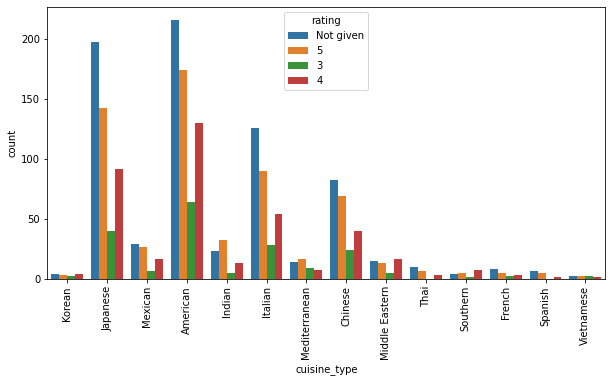

In [9]:
# Checking if there is any relation between column 'cuisine_type' and column 'rating'
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x='cuisine_type', hue='rating');
plt.xticks(rotation = 90);

### <p style="color:blue;">Observation:
    
-- From above plot we can say there is no particular pattern has been found between column 'rating' and column 'cuisine_type'.
    
-- Count of rating 'Not given' is simultaniously increased and decreased for various cuisine. 'Not given' cattegory is present  allmost in all cuisine type.

In [10]:
#Checking Number of unique category in column 'restaurant_name'
df1['restaurant_name'].nunique()

178

C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


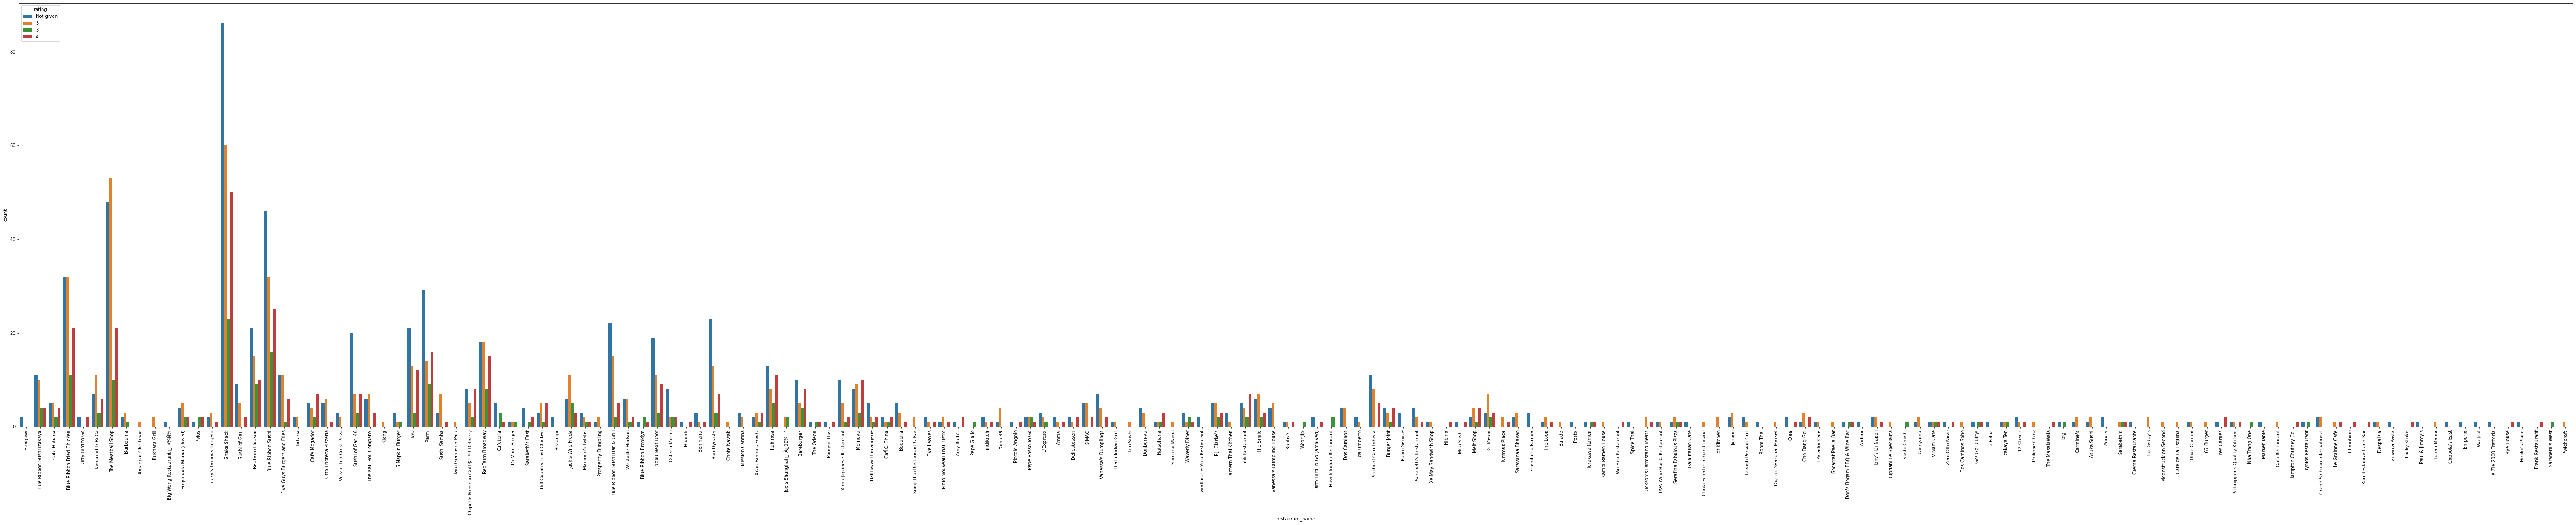

In [11]:
# Checking if there is any relation between column 'restaurant_name' and column 'rating'
plt.figure(figsize=(100,17))
sns.countplot(data=df1, x='restaurant_name', hue='rating');
plt.xticks(rotation = 90);

### <p style="color:blue;">Observation:

-- There is no significant pattern between column 'restaurant_name' and column 'rating'. 
    
-- In Next step we will replace 'Not given' values as NaN.
    
-- So, to impute NaN values we can use the average of ratings for each rasturant.

In [12]:
# Replaced Not given to NaN
df1['rating']=df1['rating'].replace(['Not given'],np.nan)

In [13]:
# checking the count of NaN values in Column 'rating'
df1.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

### <p style="color:green;">Observation:
    
-- We can see, there are 736 rows which contain Nan values.

In [14]:
# Checking type of variables in dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [15]:
# Coverted column 'rating' from object type to float type

df1['rating']=df1['rating'].astype(float)

### <p style="color:orange;">As we can see from above plot that 'Nan' values are present for all restaurents. 
### <p style="color:orange;">Now we will find average rating for each rastaurent and fill nan values.

In [16]:
# Calculating average rating for each restaurent

df1.groupby(['restaurant_name'])[['rating']].mean()

,rating
restaurant_name,
'wichcraft,5.000000
12 Chairs,4.500000
5 Napkin Burger,4.000000
67 Burger,5.000000
Alidoro,NaN
...,...
Zero Otto Nove,4.000000
brgr,3.000000
da Umberto,5.000000


In [17]:

df1['rating']=df1['rating'].fillna(value=df1.groupby(['restaurant_name'])['rating'].transform('mean'))

In [18]:
df1['rating'] = df1['rating'].apply(np.floor)
df1.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4.0,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26


In [19]:
df1.isnull().sum()


order_id                  0
customer_id               0
restaurant_name           0
cuisine_type              0
cost_of_the_order         0
day_of_the_week           0
rating                   30
food_preparation_time     0
delivery_time             0
dtype: int64

### <p style="color:blue;">Observation:
    
-- There are 30 rows which contain Nan value. 
    
-- Among these 30 rows, in most cases there is only one order record in present for one restaurant and rating is not given. So it is not possible to calculate mean rating for that restaurants to fill nan value.
    
-- So we can drop them.

In [20]:
# droping those 30 columns. 
df1 = df1.dropna()
 
# To reset the indices
df1 = df1.reset_index(drop = True)

In [21]:
# After imputing missing values we have saved the data in another name 

df1.to_csv('FoodHub_no_missing.csv', index=False)

# <p style="color:red;">Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [22]:
#Checking statistical summary of the data (Original data)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1868.0,1.477495e+06,548.909169,1476547.00,1477019.75,1477492.50,1.477973e+06,1478444.00
customer_id,1868.0,1.708020e+05,113536.338875,1311.00,77544.00,128476.50,2.704440e+05,405334.00
cost_of_the_order,1868.0,1.651219e+01,7.473723,4.47,12.08,14.16,2.227250e+01,35.41
rating,1868.0,4.226981e+00,0.631167,3.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1868.0,2.736135e+01,4.628866,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1868.0,2.418522e+01,4.960147,15.00,20.00,25.00,2.800000e+01,33.00


### <p style="color:blue;">Observation:
    
##### From above statistical table we can say
    
-- For column 'cost_of_the_order'
   --Mean cost for all order is 16.5, standard deviation 7.47, minimum cost 4.47 and maximum cost 35.41.

   --Cost of 25% of order is 12.8 Doller, cost of 50% of order is 14.16% and 75% of order cost more than 20%.
-- For Column 'rating'
    --Mean value 4.22, standard deviation 0.63, minimum rating 3 and maximum rating 5.

    --Rating of 50% of order is 4 and 75% of order is 5.
-- For Column 'food_preparation_time'
    --Mean time for all order is 27 min, standard deviation 4.62, minimum time of food preparation is 20 min and maximum time of food preparation is 35 min.

    --Food preparation time of 25% of order is 23 min, food preparation time of 50% of order is 27 min and food preparation time of 75% of order is around 30 min.
-- For column 'delivery_time'
--Mean delivery time for all order is 24 min, standard deviation 4.96. Minimum delivery time is 15 min and maximum delivery time is 33 min.

-- Food delivery time of 25% of order is 20 min, Food delivery time of 50% of order is 25 min and Food delivery time of 75% of order is around 28 min



# <p style="color:red;">Question 5: How many orders are not rated? [1 mark]

### <p style="color:green;">Answer:
    
    Previously from In[13] and Out[13], we can say that there is total 736 rows in Column 'rating' are missing.
    So we can say 736 orders were not rated.
    


# <p style="color:red;">Univariate Analysis
## <p style="color:red;">Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [23]:
# Here reading imputed missing value data set, which we have saved previously

df_NoMissing = pd.read_csv('FoodHub_no_missing.csv')

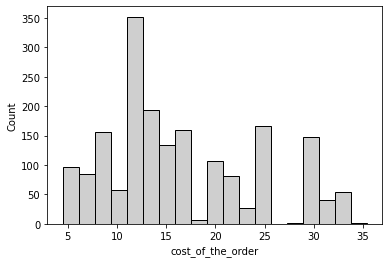

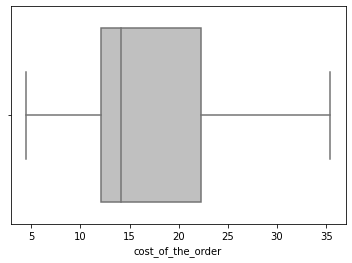

In [24]:
# Plotting histogram and box plot of column 'cost_of_the_order' to see distribution of values and outliers.

sns.histplot(data=df_NoMissing, x='cost_of_the_order',color='silver')
plt.show()
sns.boxplot(data=df_NoMissing, x='cost_of_the_order',color='silver')
plt.show()

### <p style="color:blue;">Observations:
    
-- From histogram plot we can see the distribution of cost.

-- From Boxplot we can see no outlier is present. Distribution of cost is right-skewed.

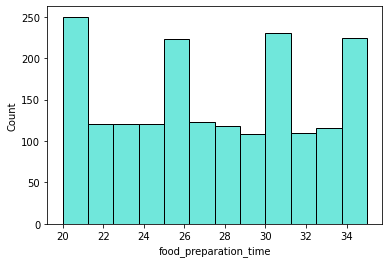

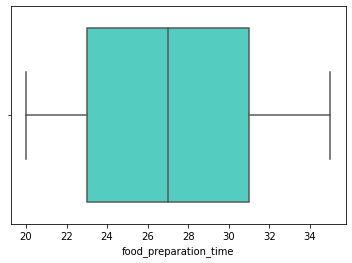

In [25]:
# Plotting histogram and box plot of column 'food_preparation_time' to see distribution of values and outliers.

sns.histplot(data=df_NoMissing, x='food_preparation_time',color='turquoise')
plt.show()
sns.boxplot(data=df_NoMissing, x='food_preparation_time', color='turquoise')
plt.show()

### <p style="color:blue;">Observation

-- Above histogram plot showing distribution of food preparation time.

-- From box plot we can say there no outlier is present.

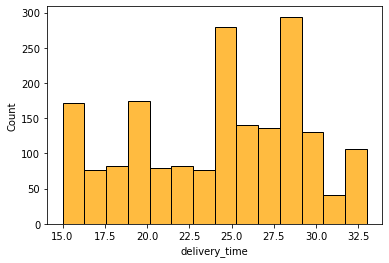

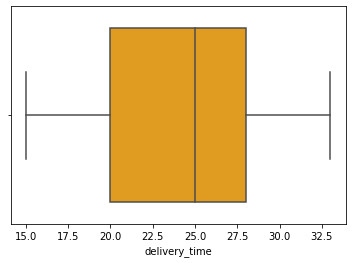

In [26]:
# Plotting histogram and box plot of column 'delivery_time' to see distribution of values and outliers.

sns.histplot(data=df_NoMissing, x='delivery_time',color='orange')
plt.show()
sns.boxplot(data=df_NoMissing, x='delivery_time',color='orange')
plt.show()

### <p style="color:blue;">Observations


-- Above histogram plot showing distribution of food preparation time.

-- From box plot we can say there no outlier is present. Distribution of delivery time is left-skewed

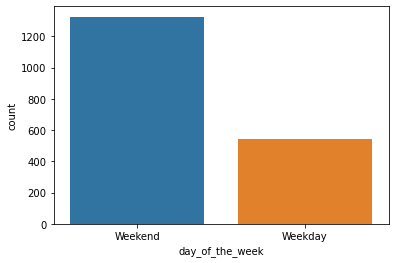

In [27]:
# Plotting number of order on weekend and weekdays

sns.countplot(data=df_NoMissing,x='day_of_the_week')
plt.show()

### <p style="color:blue;">Observation

-- Order numbers are more on weekends than weedays

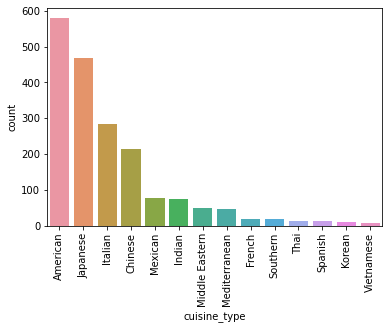

In [28]:
# Plotting count of orders for each cuisin_type. 

sns.countplot(x = 'cuisine_type',data = df_NoMissing,order = df_NoMissing['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show() 

### <p style="color:blue;">Observation
    
-- From This graph we can see which cuisine type received highs number of order and which cuisine type has received lowest number of orders.

-- Cuisine type American has received highest number of order and Japanese cuisine has received 2nd highest number of orders.

-- Cuisine type Vietnamese has received lowest number of orders.

C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mmoit\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


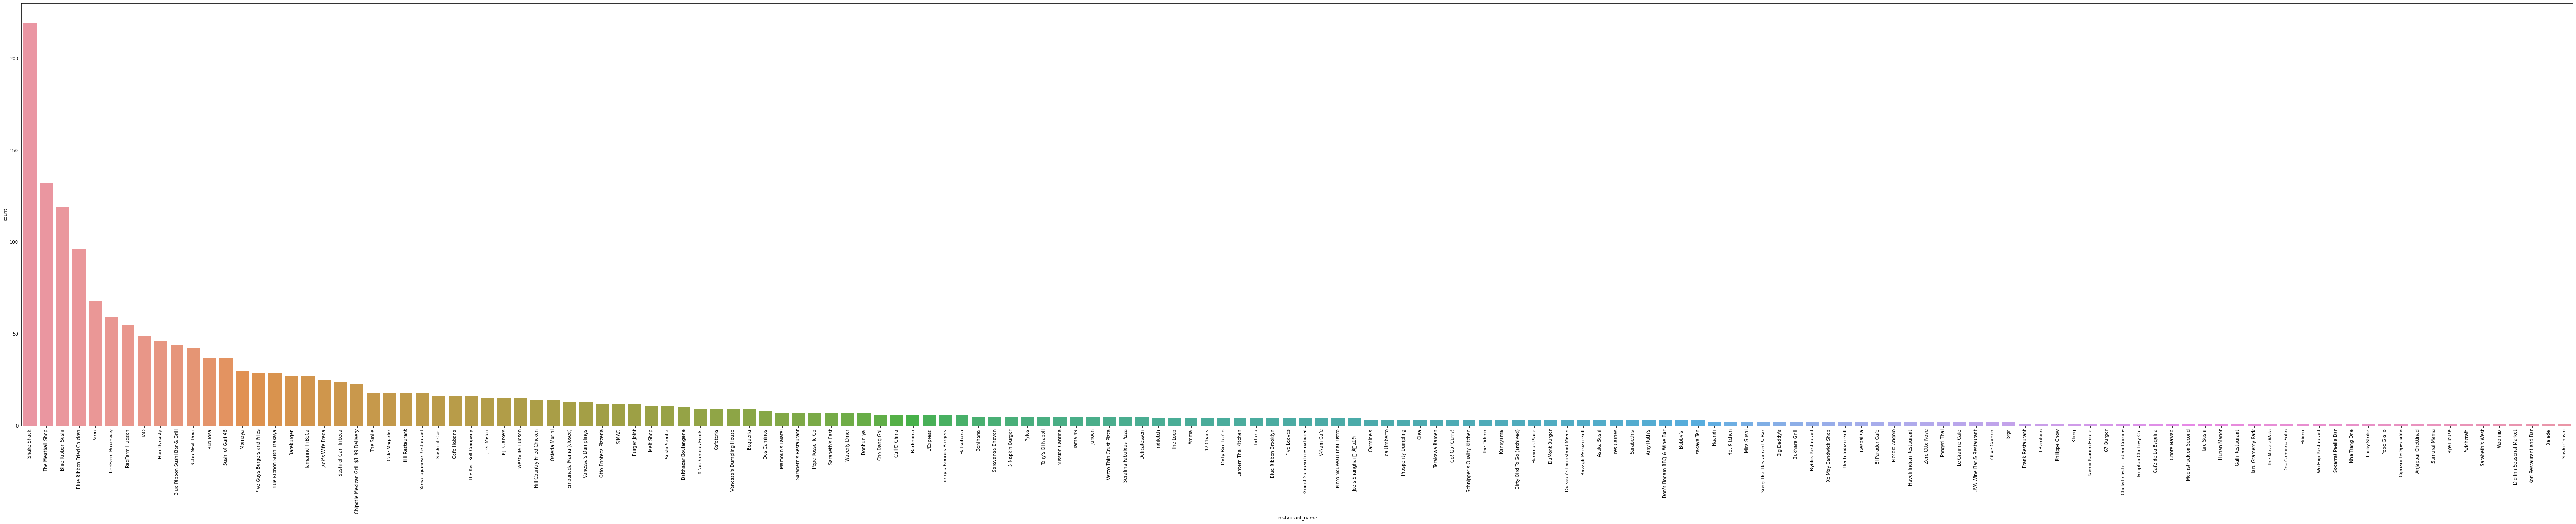

In [30]:
# Plotting count of orders for each Restaurent. 

plt.figure(figsize=(100,17))
sns.countplot(x = 'restaurant_name',data = df1, order = df1['restaurant_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### <p style="color:blue;">Obervation
-- From the above plot we can find out which restaurant has received highest number of order and which restaurant has receive lowest number of orders.
    
-- Top 3 restaurants that received highest number of orders are Shake Shack, The Meatball Shop and Blue Ribbon Sushi.
    
-- Restaurant received lowest number of orders is Pepe Glallo.

# <p style="color:red;">Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:

print(df_NoMissing['restaurant_name'].value_counts())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Woorijip                       1
Dig Inn Seasonal Market        1
Kori Restaurant and Bar        1
Balade                         1
Sushi Choshi                   1
Name: restaurant_name, Length: 156, dtype: int64


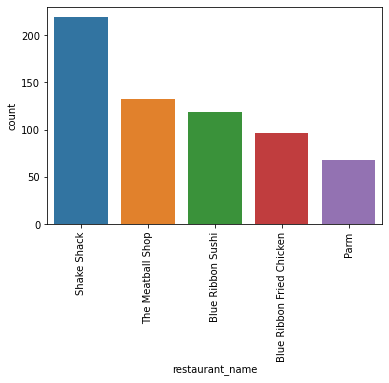

In [32]:
#From this count plot we can see which 5 restaurents received heighest number of orders

sns.countplot(x = 'restaurant_name',data = df_NoMissing, order = df_NoMissing['restaurant_name'].value_counts().head(5).index)
plt.xticks(rotation = 90)
plt.show()


### <p style="color:blue;">Observation

-- Name of top 5 restaurant’s in terms of number of order receive are 
    Shake Shack
    
    The Meatball Shop
    
    Blue Ribbon Sushi
    
    Blue Ribbon Fried Chicken
    
    Parm

# <p style="color:red;">Question 8: Which is the most popular cuisine on weekends? [1 mark]

In [33]:
# Considering orders received on weekends.

df2_weekend=df_NoMissing.loc[df_NoMissing['day_of_the_week']=='Weekend']

In [34]:

print(df2_weekend['cuisine_type'].value_counts())

American          410
Japanese          334
Italian           195
Chinese           162
Mexican            52
Indian             49
Middle Eastern     32
Mediterranean      32
French             13
Southern           11
Spanish            11
Thai               11
Korean              9
Vietnamese          4
Name: cuisine_type, dtype: int64


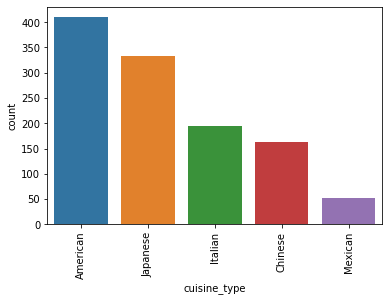

In [35]:
# Plotting count of orders for each cuisin_type on weekends. 

sns.countplot(x = 'cuisine_type',data = df2_weekend, order = df2_weekend['cuisine_type'].value_counts().head(5).index)
plt.xticks(rotation = 90)
plt.show()

### <p style="color:blue;">Observation

-- Top 5 most popular cuisine in weekends are 

American

Japanese

Italian

Chinese

Mexican

# <p style="color:red;">Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

In [37]:
df2_20=df_NoMissing['cost_of_the_order']>=20
df2_20.head()
df2_20.sum()
df2_20.mean()

0.2917558886509636

### <p style="color:blue;">Observation

29.17 percentage of orders are cost more than 20 dollars.

# <p style="color:red;">Question 10: What is the mean order delivery time? [1 mark]

In [38]:
df_NoMissing[["delivery_time"]].mean()

delivery_time    24.185225
dtype: float64

### <p style="color:blue;">Observation

-- Mean order delivery time is around 24 minuets

# <p style="color:red;">Question 11: The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [42]:
#Checking how many unique customer ID is present

df_NoMissing['customer_id'].nunique()

1183

In [44]:
print(df_NoMissing['customer_id'].value_counts().head(5))

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


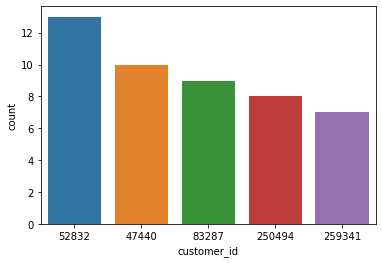

In [45]:
sns.countplot(x = 'customer_id',data = df_NoMissing, order = df_NoMissing['customer_id'].value_counts().head(5).index)
plt.show()

### <p style="color:blue;">Observation

-- Customers who placed a greater number of orders will get 20% discount.

-- Top 5 customer ID's that placed more frequent order is, 52832, 47440, 83287, 250494, 259341.


# <p style="color:red;">Multivariate Analysis
## <p style="color:red;">Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

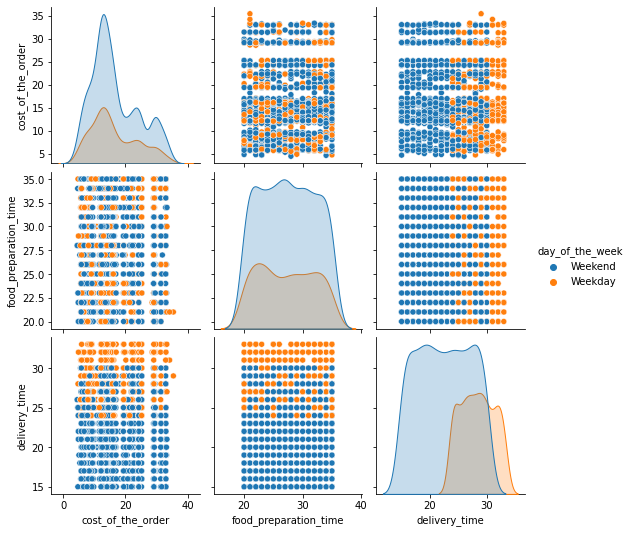

In [46]:
#Checking corelation between variables
sns.pairplot(data=df_NoMissing, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='day_of_the_week');


### <p style="color:blue;">Observation:
    
-- Here we have tried to see correlation between numerical variable of the table.
    
-- No positive correlations are present between variables.


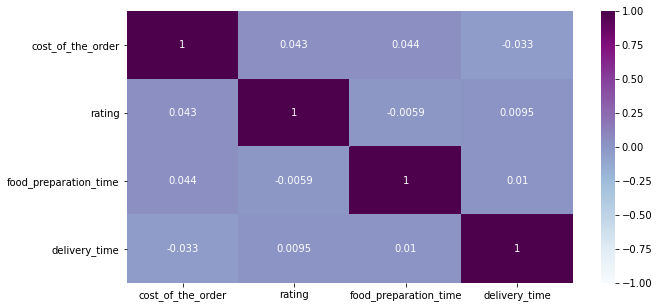

In [47]:
df_NoMissing.drop(['order_id', 'customer_id'], axis=1, inplace=True)
plt.figure(figsize=(10,5))
sns.heatmap(df_NoMissing.corr(), annot=True,cmap='BuPu',vmin=-1,vmax=1)
plt.show()


### <p style="color:blue;">Observations:

-- This is heatmap. From this we can see the amount of correlation is present between variables.
    
-- Corelation is not very high between the variables. 
    
-- One negative corelation is present between 'rating' and 'food_preparation_time'.

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

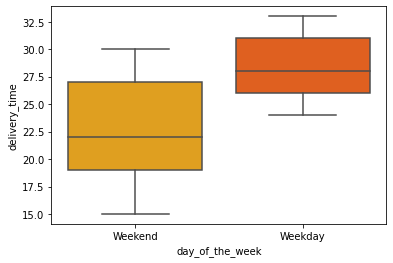

In [48]:
sns.boxplot(data=df_NoMissing, x='day_of_the_week',y='delivery_time',palette="autumn_r")

### <p style="color:blue;">Observation:

-- In weekend's delivery time remains between 15 mints to 30 mints, but in weekdays delivery time takes mostly from 25 mints to 32 mints.
    
-- So we can say that number of order is more in weedays and less in weekends.

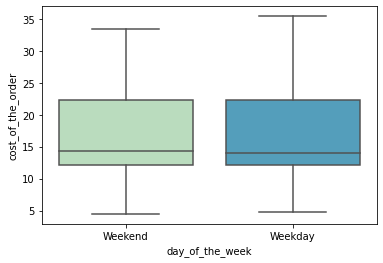

In [49]:
sns.boxplot(data=df_NoMissing, x='day_of_the_week',y='cost_of_the_order',palette="GnBu")
plt.show()

### <p style="color:blue;">Observations:
    
-- Cost of the order is same in weekday's and in weekend's.
    
-- Both of the box plots are positively skewed.

In [50]:
df_NoMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1868 non-null   object 
 1   cuisine_type           1868 non-null   object 
 2   cost_of_the_order      1868 non-null   float64
 3   day_of_the_week        1868 non-null   object 
 4   rating                 1868 non-null   float64
 5   food_preparation_time  1868 non-null   int64  
 6   delivery_time          1868 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 102.3+ KB


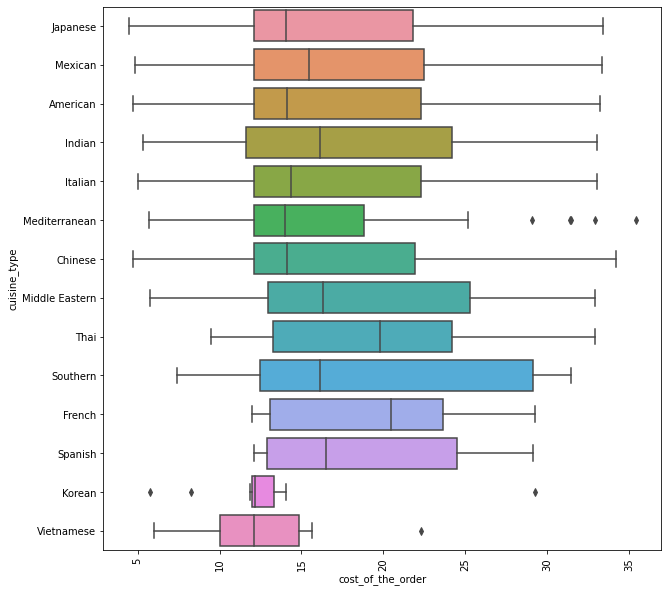

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_NoMissing, x='cost_of_the_order', y='cuisine_type')
plt.xticks(rotation=90)
plt.show()


### <p style="color:blue;">Observation:
    
-- This above plot is comparing the cost of different cuisine type.

-- We can see that the price of Japanese, Mexican American and Italian cuisine is almost similar. Their range of cost is between 4 to 32 $. Here 75% orders have cost more then 15$.

-- Almost 75% of Indian and middle eastern orders cost more than 15$

-- almost 75% of Chinese orders cost more than 15$.

-- more than 75% Mediterranean orders cost 15 to 25 $, but here some outliers are present which indicates that some orders which cost around up to 35$. The most costliest order was placed from this cuisine type, which is 35.4$.

-- Thai and French Cuisines starting price is little costlier than other. Price range of Thai cuisine is 10$ - 33$. Minimum price of French cuisine starts from around 12$. But 75% of Thai and French cuisine cost less than 20$. Although the highest price range of French cuisine is less than 30$.

-- Cost of 75% of southern cuisine is more than 15$ and up to 30$.. 

-- Cost of Korean cuisine is less than all the other cuisine, price range 5 to 13 $.

-- Cost of Vietnamese Cuisine is also very less, price range mostly 5 to 15 $. But some outliers are there that means price of come food is more than 20$.


<Figure size 1440x360 with 0 Axes>

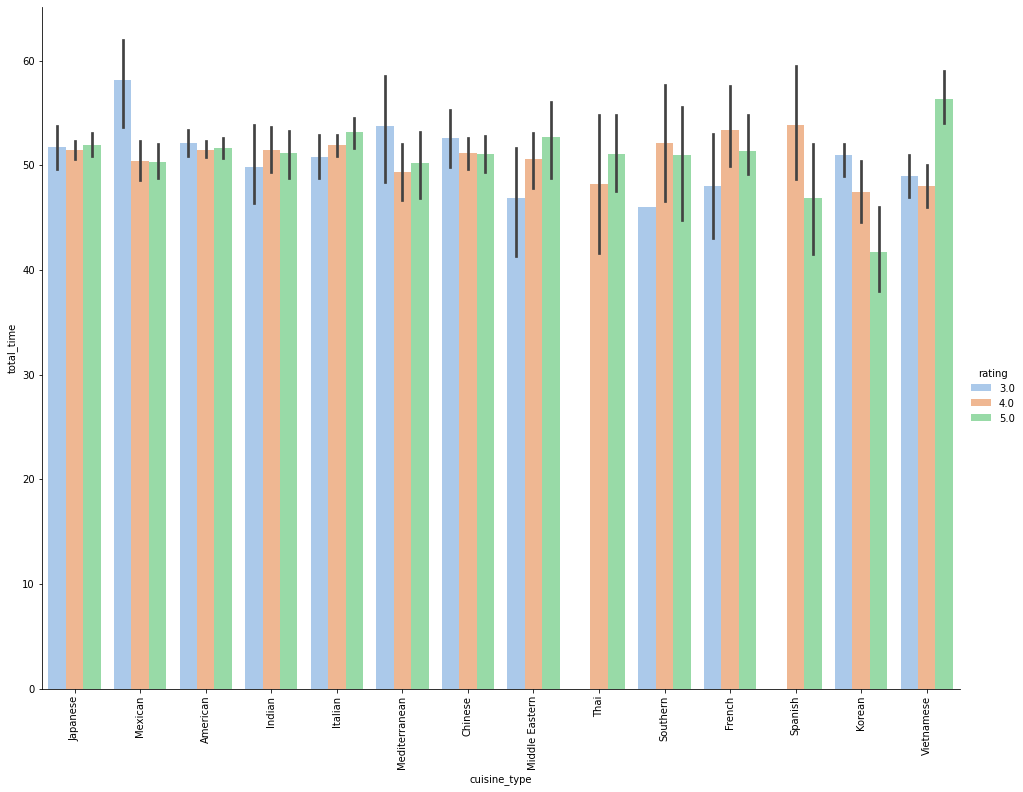

In [52]:
# Calculating total_time, which is sum of 'food_preparation_time' and 'delivery_time'. Then compared total time with for each 'cuisine_type' and how much rating they obtained.

df_NoMissing['total_time']=df_NoMissing['food_preparation_time']+df_NoMissing['delivery_time']
plt.figure(figsize=(20,5))
sns.catplot(data=df_NoMissing, x='cuisine_type', y="total_time", hue="rating", kind='bar',palette='pastel', height=10, aspect=12/9)
plt.xticks(rotation=90)
plt.show()

### <p style="color:blue;">Obsevation:
    
-- We calculated total time by adding food_preparation_time and delivery_time.
    
-- Ploted total time for each restaurent and checked whether it has any relation with rating.
    
-- We found that cuisine_type Mexican wich takes more time then any other cuisine has received highest number of rating 3.
    
-- From that we can say, if they will try to decrease their is a possibility to get better rating for that particular cuisine.

# <p style="color:red;">Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

-- Here I have used the original data set (where missing values are present). 

-- As per the question company will provide promotional offer only to those restaurant’s, who has received more than 50 ratings from customers. That’s why the original dataset has been used here.

-- Dropped all missing values.

-- Then calculated how many restaurant’s obtained ratings more than 50 from customers.


In [54]:
# Reading original data

Food= pd.read_csv('foodhub_order.csv')

In [55]:
Food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [56]:
Food.shape

(1898, 9)

In [57]:
indexNames = Food[Food['rating'] == "Not given" ].index

Food.drop(indexNames , inplace=True)

In [58]:
Food.head()
Food.shape

(1162, 9)

### <p style="color:orange;">Find out restaurants with rating count of more than 50

In [59]:
print(Food['restaurant_name'].value_counts())
rating_count50=Food['restaurant_name'].value_counts().reset_index()
rating_count50.loc[rating_count50['restaurant_name']>50]

Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Galli Restaurant               1
Kambi Ramen House              1
Piccolo Angolo                 1
Wo Hop Restaurant              1
DespaÌ±a                       1
Name: restaurant_name, Length: 156, dtype: int64


,index,restaurant_name
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


### <p style="color:blue;">Observation:
-- Here we can see that only four restaurants obtained ratings more than 50 from customers, those are
    Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken


### <p style="color:orange;">Find out those resturent which has average rating greater than 4

In [60]:
#rating is object type, converted into integer type
Food.info()
Food['rating'] = Food['rating'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB


In [61]:
#find out average rating for each restaurent
rating_average4= Food.groupby('restaurant_name')['rating'].agg('mean').reset_index()

print(rating_average4.loc[rating_average4['rating']>4])


              restaurant_name    rating
0                  'wichcraft  5.000000
1                   12 Chairs  4.500000
3                   67 Burger  5.000000
4                        Amma  4.500000
6          Anjappar Chettinad  5.000000
..                        ...       ...
149                   Yama 49  5.000000
150  Yama Japanese Restaurant  4.500000
153                da Umberto  5.000000
154          ilili Restaurant  4.153846
155                 indikitch  4.500000

[110 rows x 2 columns]


In [62]:
#Checked whether average rating is more than 4 or not for those restaurents which have rating count more than 50
resturents = ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken'] 
# selecting rows based on condition
print(rating_average4[rating_average4['restaurant_name'].isin(resturents)])

               restaurant_name    rating
16   Blue Ribbon Fried Chicken  4.328125
17           Blue Ribbon Sushi  4.219178
117                Shake Shack  4.278195
132          The Meatball Shop  4.511905


### <p style="color:blue;">Observation:
-- We can say that all four restaurants which has rating count more than 50, are also falls under the condition of average rating more than 4.

-- So we can say that, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop these restaurants are eligible to get promotional offer from company



# <p style="color:red;">Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [63]:
# Here we are using missing value imputed dataset
cost=df_NoMissing['cost_of_the_order']


In [64]:
sum=0
for i in cost:
    if (i > 20):
        i = (i*0.25)
        sum=sum+i
    elif (i>5 and i<20):
        i=(i*0.15)
        sum=sum+i         
    else:
        print('no')
        
print(sum)

no
no
no
no
no
no
no
no
no
6069.881999999994


### <p style="color:blue;">Observation:
    
-- So we can see the net revenue generated by the company is 6069.88
    
    

# <p style="color:red;">Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [65]:
#Previously we have calculated total time by adding 'delivery_time' and 'food_preparation_time' in In[52]

for i in df_NoMissing.columns:
    print(i)

restaurant_name
cuisine_type
cost_of_the_order
day_of_the_week
rating
food_preparation_time
delivery_time
total_time


In [66]:
#Checked which rows have total time greater than 60 mint
df2_TotalTime60=df_NoMissing['total_time']>=60

In [67]:
#Cakculated what percentage of order took more than 600 mints to get delivered
percentage100=df2_TotalTime60.value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'
percentage100

False    87.1%
True     12.9%
Name: total_time, dtype: object

### <p style="color:blue;">Observations
-- We can say that 12.9% of orders takes more than 60 mints to get delivered.

# <p style="color:red;">Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [68]:
df_weekday=df_NoMissing.loc[df_NoMissing['day_of_the_week']=='Weekday']
df_weekday[["delivery_time"]].mean()

delivery_time    28.32965
dtype: float64

In [69]:
df_weekend=df_NoMissing.loc[df_NoMissing['day_of_the_week']=='Weekend']
df_weekend[["delivery_time"]].mean()

delivery_time    22.486792
dtype: float64

### <p style="color:blue;">Observation

-- Mean delivery time in weekend is around 23 minuets

-- Mean delivery time in weekday is around 29 minuets

##### Submitted by-- Moumita Moitra